# S&P 500 Analysis

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Define the start and end years (YYYY)
start_year = '1928'
end_year = '2025'

In [34]:
plt.rcParams.update({
    'axes.titlesize': 20,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

## Raw Data

In [35]:
daily_df = pd.read_csv("SPX_1927_2024.csv")
daily_df['Date'] = pd.to_datetime(daily_df['Date'], format='%d/%m/%Y')
display(daily_df)

,Date,Close,Open,High,Low
0,1927-12-30,17.66,17.66,17.66,17.66
1,1928-01-03,17.76,17.76,17.76,17.76
2,1928-01-04,17.72,17.72,17.72,17.72
3,1928-01-05,17.55,17.55,17.55,17.55
4,1928-01-06,17.66,17.66,17.66,17.66
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


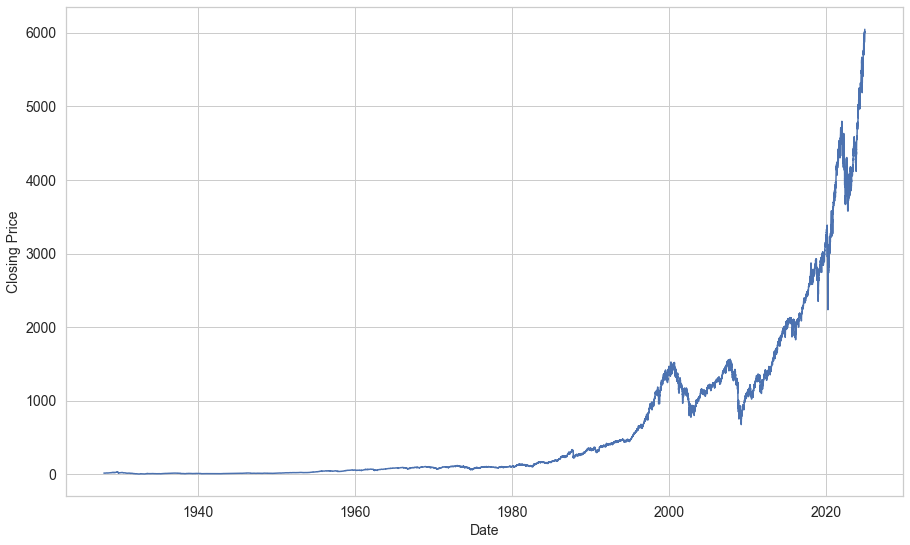

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,9))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Daily, Monthly and Yearly Charts

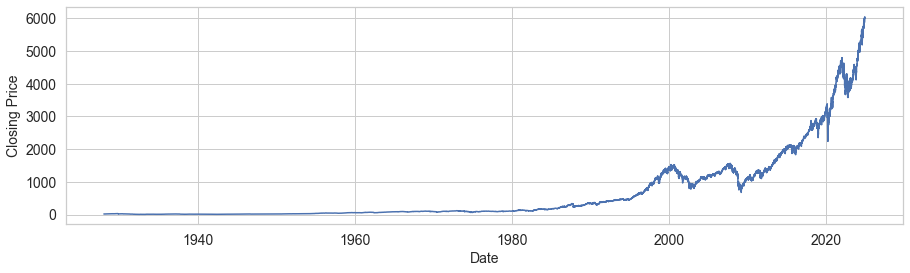

In [37]:
# Slice the DataFrame
daily_df = daily_df[(daily_df['Date'] >= start_year) & (daily_df['Date'] <= end_year)]

sns.set(style="whitegrid")

plt.figure(figsize=(15,4))
sns.lineplot(data=daily_df, x="Date", y="Close")

plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [38]:
display(daily_df)

,Date,Close,Open,High,Low
1,1928-01-03,17.76,17.76,17.76,17.76
2,1928-01-04,17.72,17.72,17.72,17.72
3,1928-01-05,17.55,17.55,17.55,17.55
4,1928-01-06,17.66,17.66,17.66,17.66
5,1928-01-09,17.50,17.50,17.50,17.50
...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98


In [39]:
yearly_data = []
monthly_data = []

for year in range(int(start_year),int(end_year)):

    start_date = str(year) + '-01-01'
    end_date = str(year) + '-12-31'

    year_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] <= end_date)]

    y_open = year_data_df["Open"].iloc[0]
    y_close = year_data_df["Close"].iloc[-1]
    y_low = year_data_df["Low"].min()
    y_high = year_data_df["High"].max()

    yearly_data.append([year, y_close, y_open, y_high, y_low])

    for month in range(1,13):

        start_date = str(year) + "-" + str(month) + "-" + "01"
        end_date = str(year) + "-" + str(month + 1) + "-" + "01"
        if month + 1 == 13:
            end_date = str(year + 1) + "-" + "01" + "-" + "01"

        month_data_df = daily_df[(daily_df['Date'] >= start_date) & (daily_df['Date'] < end_date)]

        m_open = month_data_df["Open"].iloc[0]
        m_close = month_data_df["Close"].iloc[-1]
        m_low = month_data_df["Low"].min()
        m_high = month_data_df["High"].max()

        monthly_data.append([str(year) + "-" + str(month), m_close, m_open, m_high, m_low])


In [40]:
monthly_df = pd.DataFrame(data=monthly_data, columns=["Date", "Close", "Open", "High", "Low"])
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m')
display(monthly_df)

,Date,Close,Open,High,Low
0,1928-01-01,17.57,17.76,17.76,17.26
1,1928-02-01,17.26,17.53,17.63,16.95
2,1928-03-01,19.28,17.30,19.28,17.30
3,1928-04-01,19.75,18.91,19.75,18.91
4,1928-05-01,20.00,19.78,20.44,19.36
...,...,...,...,...,...
1159,2024-08-01,5648.40,5537.84,5651.62,5119.26
1160,2024-09-01,5762.48,5623.89,5767.37,5402.62
1161,2024-10-01,5705.45,5757.73,5878.46,5674.00
1162,2024-11-01,6032.38,5723.22,6044.17,5696.51


In [41]:
yearly_df = pd.DataFrame(data=yearly_data, columns=["Date", "Close", "Open", "High", "Low"])
yearly_df['Date'] = pd.to_datetime(yearly_df['Date'], format='%Y')
display(yearly_df)

,Date,Close,Open,High,Low
0,1928-01-01,24.35,17.76,24.35,16.95
1,1929-01-01,21.45,24.81,31.86,17.66
2,1930-01-01,15.34,21.18,25.92,14.44
3,1931-01-01,8.12,15.85,18.17,7.72
4,1932-01-01,6.92,7.56,9.31,4.40
...,...,...,...,...,...
92,2020-01-01,3756.07,3244.67,3760.20,2191.86
93,2021-01-01,4766.18,3764.61,4808.93,3662.71
94,2022-01-01,3839.50,4778.14,4818.62,3491.58
95,2023-01-01,4769.83,3853.29,4793.30,3794.33


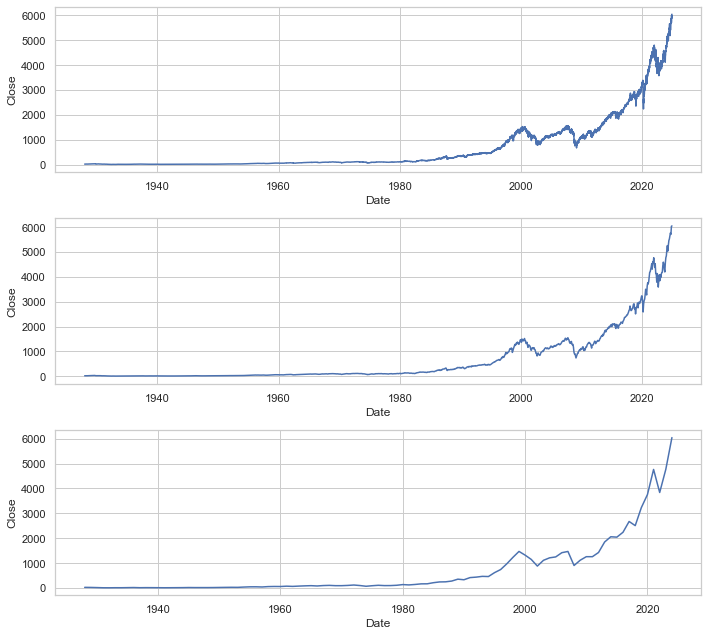

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(10,9))

sns.lineplot(ax=axes[0], data=daily_df, x="Date", y="Close")
sns.lineplot(ax=axes[1], data=monthly_df, x="Date", y="Close")
sns.lineplot(ax=axes[2], data=yearly_df, x="Date", y="Close")
plt.tight_layout()

## Analysis

### Yearly

In [43]:
yearly_df["% Change"] = yearly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(yearly_df)

,Date,Close,Open,High,Low,% Change
0,1928-01-01,24.35,17.76,24.35,16.95,37.11
1,1929-01-01,21.45,24.81,31.86,17.66,-13.54
2,1930-01-01,15.34,21.18,25.92,14.44,-27.57
3,1931-01-01,8.12,15.85,18.17,7.72,-48.77
4,1932-01-01,6.92,7.56,9.31,4.40,-8.47
...,...,...,...,...,...,...
92,2020-01-01,3756.07,3244.67,3760.20,2191.86,15.76
93,2021-01-01,4766.18,3764.61,4808.93,3662.71,26.60
94,2022-01-01,3839.50,4778.14,4818.62,3491.58,-19.64
95,2023-01-01,4769.83,3853.29,4793.30,3794.33,23.79


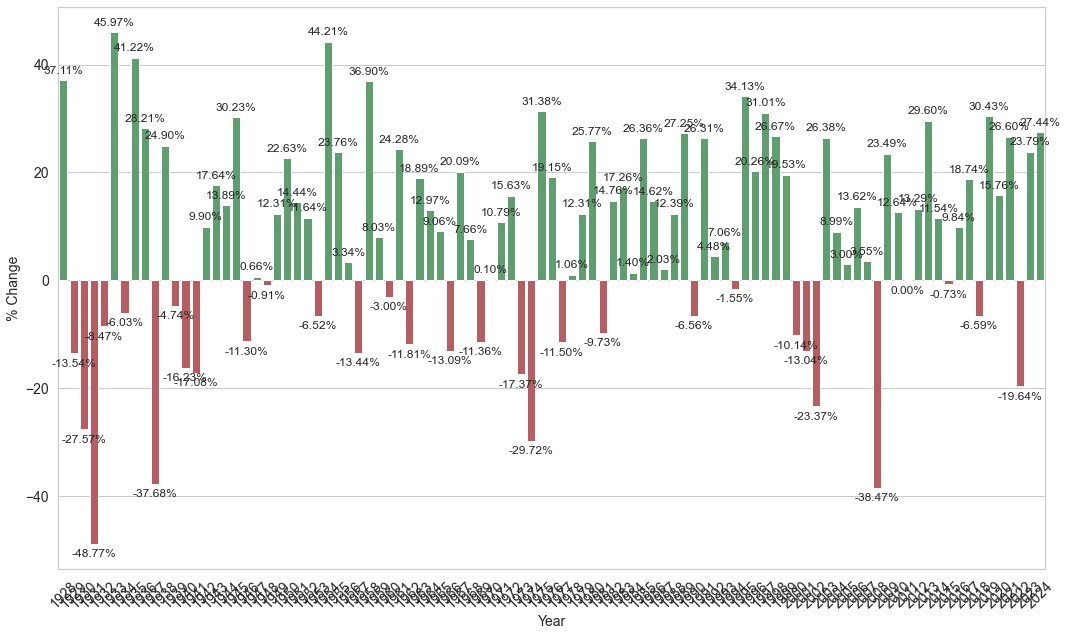

In [44]:
colors = ["g" if val >= 0 else "r" for val in yearly_df["% Change"]]

plt.figure(figsize=(15,9))
plt.xticks(rotation=45)
barplot = sns.barplot(data=yearly_df, x=yearly_df["Date"].dt.year, y="% Change", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
    else:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, -10), 
                        textcoords = 'offset points')

plt.xlabel("Year", fontsize=14)
plt.ylabel("% Change", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

In [62]:
percentage_change = round((yearly_df["Close"].iloc[-1] - yearly_df["Open"].iloc[0])/yearly_df["Open"].iloc[0]*100, 2)

print(f"Percentage Change in period: {percentage_change}%")

Percentage Change in period: 33949.27%


In [46]:
yearly_df["% Change"].describe()

count    97.000000
mean      8.045361
std      19.000378
min     -48.770000
25%      -6.030000
50%      11.540000
75%      23.490000
max      45.970000
Name: % Change, dtype: float64

In [47]:
positive_years = yearly_df[(yearly_df['% Change'] >= 0)].shape[0]
negative_years = yearly_df[(yearly_df['% Change'] < 0)].shape[0]

pos_percent = round(positive_years/(positive_years + negative_years)*100, 2)
neg_percent = round(negative_years/(positive_years + negative_years)*100, 2)

print(f"Number of positive years in period: {positive_years} - Percentage of positive years: {pos_percent}%")
print(f"Number of negative years in period: {negative_years} - Percentage of negative years: {neg_percent}%")

Number of positive years in period: 67 - Percentage of positive years: 69.07%
Number of negative years in period: 30 - Percentage of negative years: 30.93%


(array([-60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

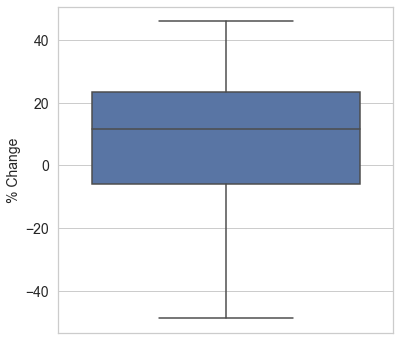

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(data=yearly_df, y="% Change")
plt.ylabel('% Change', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [49]:
years_change_distribution = []

## < -30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] < -30)].shape[0])
## -30% <= % Change < -20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -30) & (yearly_df['% Change'] < -20)].shape[0])
## -20% <= % Change < -10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -20) & (yearly_df['% Change'] < -10)].shape[0])
## -10% <= % Change < 0%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= -10) & (yearly_df['% Change'] < 0)].shape[0])
## 0% <= % Change < 10%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 0) & (yearly_df['% Change'] < 10)].shape[0])
## 10% <= % Change < 20%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 10) & (yearly_df['% Change'] < 20)].shape[0])
## 20% <= % Change < 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 20) & (yearly_df['% Change'] < 30)].shape[0])
## >= 30%
years_change_distribution.append(yearly_df[(yearly_df['% Change'] >= 30)].shape[0])

In [50]:
years_change_distribution_df = pd.DataFrame(
    data={
        "% Change": ["< -30%", "-30% to -20%", "-20% to -10%", "-10% to 0%", "0% to 10%", "10% to 20%", "20% to 30%", ">= 30%"],
        "# Years": years_change_distribution
    }
)
display(years_change_distribution_df)

,% Change,# Years
0,< -30%,3
1,-30% to -20%,3
2,-20% to -10%,13
3,-10% to 0%,11
4,0% to 10%,17
5,10% to 20%,22
6,20% to 30%,18
7,>= 30%,10


(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

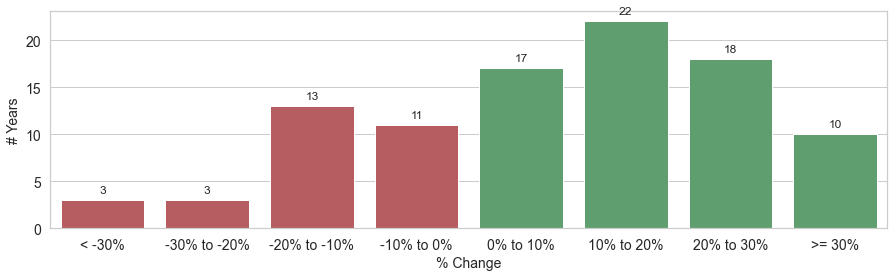

In [51]:
c1 = ["r" for i in range(4)]
c2 = ["g" for i in range(4)]
colors = c1 + c2

plt.figure(figsize=(15,4))
barplot = sns.barplot(data = years_change_distribution_df, x="% Change", y="# Years", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
        
plt.xlabel('% Change', fontsize=14)
plt.ylabel('# Years', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Monthly

In [52]:
monthly_df["% Change"] = monthly_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(monthly_df)

,Date,Close,Open,High,Low,% Change
0,1928-01-01,17.57,17.76,17.76,17.26,-1.07
1,1928-02-01,17.26,17.53,17.63,16.95,-1.54
2,1928-03-01,19.28,17.30,19.28,17.30,11.45
3,1928-04-01,19.75,18.91,19.75,18.91,4.44
4,1928-05-01,20.00,19.78,20.44,19.36,1.11
...,...,...,...,...,...,...
1159,2024-08-01,5648.40,5537.84,5651.62,5119.26,2.00
1160,2024-09-01,5762.48,5623.89,5767.37,5402.62,2.46
1161,2024-10-01,5705.45,5757.73,5878.46,5674.00,-0.91
1162,2024-11-01,6032.38,5723.22,6044.17,5696.51,5.40


In [53]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_dfs = []

for i in range(1,13):
    months_dfs.append(monthly_df[monthly_df["Date"].dt.month == i])

In [54]:
for month, month_df in zip(months, months_dfs):
    print("---------------------------------")
    print(f"Descriptive Statistics for {month}")
    print(month_df["% Change"].describe())

---------------------------------
Descriptive Statistics for Jan
count    97.000000
mean      1.200412
std       4.690575
min      -8.540000
25%      -2.530000
50%       1.620000
75%       4.160000
max      13.180000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Feb
count    97.000000
mean     -0.181340
std       4.072069
min     -15.140000
25%      -2.850000
50%       0.200000
75%       2.370000
max      11.570000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Mar
count    97.000000
mean      0.468247
std       5.031258
min     -25.830000
25%      -1.400000
50%       1.020000
75%       3.380000
max      11.450000
Name: % Change, dtype: float64
---------------------------------
Descriptive Statistics for Apr
count    97.000000
mean      1.155567
std       5.943142
min     -18.800000
25%      -1.850000
50%       0.910000
75%       4.000000
max      33.390000
Name: % Change, dtype: float64
--------

In [55]:
monthly_averages = []

for month_df in months_dfs:

    monthly_averages.append(month_df["% Change"].mean())

monthly_averages_df = pd.DataFrame(
    data={
        "Month": months,
        "Average % Change": monthly_averages
    }
)

display(monthly_averages_df)

,Month,Average % Change
0,Jan,1.200412
1,Feb,-0.181340
2,Mar,0.468247
3,Apr,1.155567
4,May,-0.031649
5,Jun,0.831443
6,Jul,1.429794
7,Aug,0.515155
8,Sep,-1.132165
9,Oct,0.459485


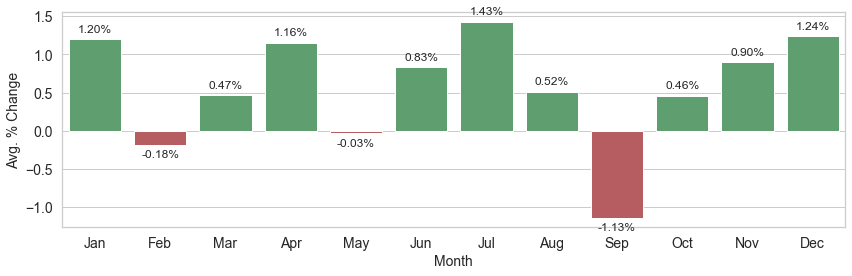

In [56]:
colors = ["g" if val >= 0 else "r" for val in monthly_averages_df["Average % Change"]]

plt.figure(figsize=(12,4))
barplot = sns.barplot(data=monthly_averages_df, x="Month", y="Average % Change", palette=colors)
for p in barplot.patches: 
    if p.get_height() > 0:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points')
    else:
        barplot.annotate(f'{p.get_height():.2f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, -10), 
                        textcoords = 'offset points')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Avg. % Change', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

### Daily

In [57]:
daily_df["% Change"] = daily_df.apply(lambda row: round(((row["Close"] - row["Open"])/row["Open"])*100, 2), axis=1)
display(daily_df)

,Date,Close,Open,High,Low,% Change
1,1928-01-03,17.76,17.76,17.76,17.76,0.00
2,1928-01-04,17.72,17.72,17.72,17.72,0.00
3,1928-01-05,17.55,17.55,17.55,17.55,0.00
4,1928-01-06,17.66,17.66,17.66,17.66,0.00
5,1928-01-09,17.50,17.50,17.50,17.50,0.00
...,...,...,...,...,...,...
24342,2024-11-25,5987.37,5992.28,6020.75,5963.91,-0.08
24343,2024-11-26,6021.63,6000.03,6025.42,5992.27,0.36
24344,2024-11-27,5998.74,6014.11,6020.16,5984.87,-0.26
24345,2024-11-29,6032.38,6003.98,6044.17,6003.98,0.47


In [58]:
daily_df["% Change"].describe()

count    24346.000000
mean         0.018546
std          0.785319
min        -20.470000
25%         -0.140000
50%          0.000000
75%          0.230000
max         10.790000
Name: % Change, dtype: float64

## S&P 500 Constituents

In [59]:
# import requests
# from bs4 import BeautifulSoup

# # Scrape data from Wikipedia
# url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')

# # Extract the constituents table
# table = soup.find('table', {'id': 'constituents'})
# current_constituents_df = pd.read_html(str(table))[0]

# # Display the data
# display(current_constituents_df)


In [60]:
current_constituents_df = pd.read_csv("sp500_companies.csv")
display(current_constituents_df)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,246.75,3729823629312,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.066042
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,138.81,3399456915456,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.060192
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,446.02,3316105084928,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058716
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,226.09,2377336487936,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042094
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,175.37,2156594987008,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.038185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,HII,"Huntington Ingalls Industries,","Huntington Ingalls Industries, Inc.",Industrials,Aerospace & Defense,193.25,7561737216,1.071000e+09,-0.024,Newport News,VA,United States,44000.0,"Huntington Ingalls Industries, Inc. designs, b...",0.000134
499,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,34.30,7501409792,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000133
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,58.18,7262958592,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000129
501,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,69.51,6570551296,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000116


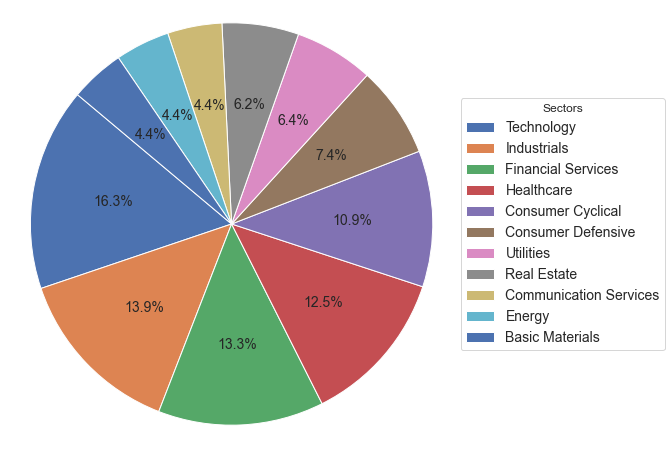

In [61]:
# Step 2: Calculate Percentages 
gics_counts = current_constituents_df['Sector'].value_counts() 
gics_percentages = gics_counts / gics_counts.sum() * 100

# Step 3: Plot Pie Chart
plt.figure(figsize=(8, 8))
#plt.pie(gics_percentages, labels=gics_percentages.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
wedges, _, _ = plt.pie(gics_percentages, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.axis('equal')
plt.legend(wedges, gics_percentages.index,
          title="Sectors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)